In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import GridEnv
from dqn import DQN
from cnn import CNN

from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

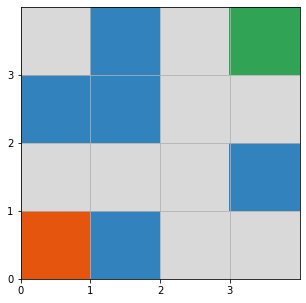

In [3]:
env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=100,
    img_state=True,
    greyscale=True,
    img_size=(64, 64),
)

In [4]:
target_net = CNN(
    img_dim=1 if env.greyscale else 3,
    w=env.img_size[0],
    h=env.img_size[1],
    input_dim=np.prod(env.img_size),
    output_dim=env.n_actions,
)

policy_net = CNN(
    img_dim=1 if env.greyscale else 3,
    w=env.img_size[0],
    h=env.img_size[1],
    input_dim=np.prod(env.img_size),
    output_dim=env.n_actions,
)

dqn = DQN(
    env=env,
    log_freq=10,
    train_freq=3,
    batch_size=10,
    w_sync_freq=10,
    memory_size=100,
    epsilon_start=0.8,
    epsilon_decay=0.990,
    gamma=0.9,
    step_size=0.001,
    episodes=400,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.01),
    load_pretrained=False,
    save_pretrained=False,
    model_path='../models/dqn_cnn',
)

dqn.run()

Episode: 0, Reward: -531.4000000000009, Loss: 0


..\dqn.py:152: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  states = FT(states)


Episode: 10, Reward: -42.800000000000004, Loss: 22.444442749023438
Episode: 20, Reward: -49.8, Loss: 19.50984001159668
Episode: 30, Reward: -11.100000000000001, Loss: 1.2378628253936768
Episode: 40, Reward: -117.34999999999995, Loss: 13.373997688293457
Episode: 50, Reward: -58.699999999999996, Loss: 6.413362503051758
Episode: 60, Reward: -50.50000000000001, Loss: 7.408157825469971
Episode: 70, Reward: -81.34999999999998, Loss: 10.773926734924316
Episode: 80, Reward: -33.75000000000001, Loss: 7.794886112213135
Episode: 90, Reward: -11.100000000000001, Loss: 1.6073839664459229
Episode: 100, Reward: 4.75, Loss: 1.3671581745147705
Episode: 110, Reward: -42.70000000000001, Loss: 8.820280075073242
Episode: 120, Reward: -58.45000000000003, Loss: 21.031145095825195
Episode: 130, Reward: -11.05, Loss: 3.7780959606170654
Episode: 140, Reward: -17.1, Loss: 6.506504535675049
Episode: 150, Reward: 4.75, Loss: 1.1100401878356934
Episode: 160, Reward: 4.75, Loss: 0.9496863484382629
Episode: 170, Rewa

In [5]:
_, action_seq = dqn.evaluate_one_episode()
dqn.env.animate(action_seq=action_seq, filename='dqn_cnn.mp4')
Video('dqn_cnn.mp4')

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

In [6]:
dqn.evaluate()

#### Training

Text(0.5, 1.0, 'Epsilon decay per episode')

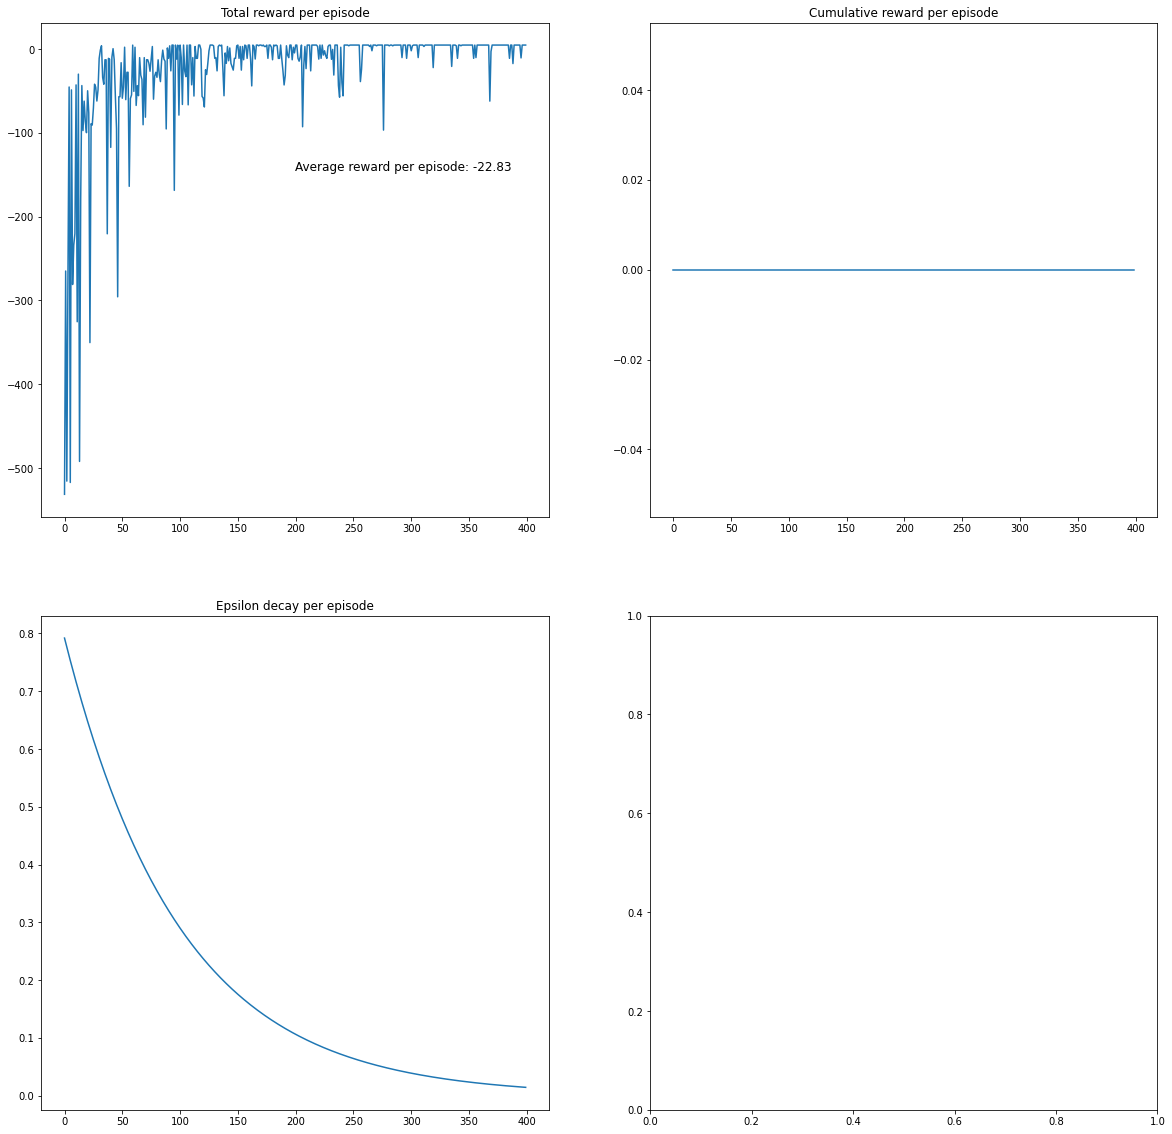

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

total_rewards = [log['reward'] for _, log in dqn.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(dqn.episodes), total_rewards)
ax[0][0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')

cumulative_rewards = [log['cumulative_reward'] for _, log in dqn.logs.items()]
ax[0][1].plot(range(dqn.episodes), cumulative_rewards)
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(dqn.episodes), [log['epsilon'] for _, log in dqn.logs.items()])
ax[1][0].set_title('Epsilon decay per episode')

#### Evaluation

Text(0.5, 1.0, 'Cumulative reward per episode')

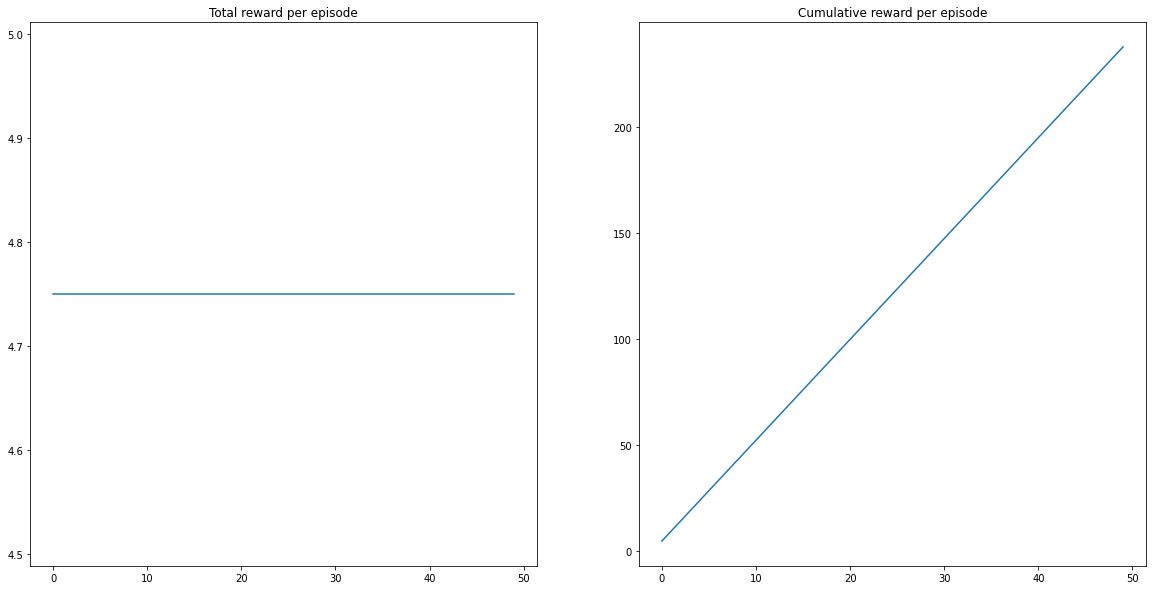

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].plot(range(dqn.eval_episodes), [log['reward'] for _, log in dqn.eval_logs.items()])
ax[0].set_title('Total reward per episode')

ax[1].plot(range(dqn.eval_episodes), [log['cumulative_reward'] for _, log in dqn.eval_logs.items()])
ax[1].set_title('Cumulative reward per episode')